In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats.stats import pearsonr
import networkx as nx
import community
from matplotlib import pyplot as plt
from bctpy.bct.utils.other import threshold_proportional
import slir

In [2]:
def pearson_corr_with_pval(C):
    corr = np.zeros((len(C), len(C)))
    pval = np.zeros((len(C), len(C)))

    for i in range(len(C)):
        for j in range(len(C)):
            corr[i][j], pval[i][j] = pearsonr(C[i], C[j])
    return corr, pval

In [43]:
C = np.load('../Glasser180ts_rest_npy/sub-03.npy')
# C = np.load('../AAL116ts_run1_npy/sub-01.npy')

In [44]:
corr, pval = pearson_corr_with_pval(C)

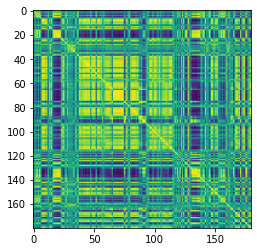

In [45]:
plt.imshow(corr)

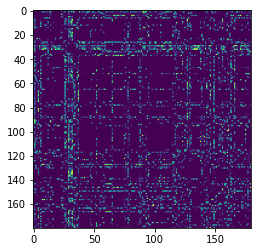

In [46]:
plt.imshow(pval)

In [47]:
results_df = pd.read_csv('../all_results_JASP_output21.csv')
results_df = results_df[:57]

In [48]:
results_df.tail()

,Participant ID,Control/Patient,Completed full study,Gender,DOB,age,CRP,ESR,RheumatoidFactor,DAS score translated,...,preSMA_PPE,preSMA_RPE-PPE,preSMApeak_RPE,preSMApeak_PPE,preSMApk_RPE-PPE,LRr*R,LRp*P,age_demeaned,P_demean,R_demean
52,P75,Control,y,Female,21/12/1957,61.0,0.0,12.0,0.0,2.02 (remission),...,0.7886,-0.1553,1.2750,1.3200,-0.0450,4.695488,2.912513,8.32,-2.322121,-2.448194
53,P76,Control,y,Female,23/02/1972,46.0,0.0,5.0,0.0,1.13 (remission),...,0.6475,-1.0993,0.3530,0.8633,-0.5103,7.734734,4.707469,-6.68,0.608655,2.483694
54,P78,Control,y,Male,20/07/1979,39.0,0.0,4.0,0.0,NaN,...,0.7121,-0.6074,0.1083,1.1270,-1.0187,1.921451,2.832947,-13.68,-4.235522,-8.746788
55,P79,Control,y,Female,20/09/1970,48.0,0.0,7.0,0.0,NaN,...,1.2560,-1.7586,-0.5731,1.3140,-1.8871,4.297163,0.415976,-4.68,-7.110546,-3.363680
56,P80,Control,y,Female,13/05/1961,57.0,5.0,22.0,0.0,NaN,...,1.2500,-0.0300,1.7480,1.4200,0.3280,5.184762,2.385175,4.32,-1.330016,2.383224


In [49]:
num_ROIs = 180
adj_mat = corr
for j in range(num_ROIs):
    for j in range(num_ROIs):
        adj_mat[j][j] = 0

thresholded_adj_mat_pval_based = np.zeros_like(adj_mat)
binarized_adj_mat_pval_based = np.zeros_like(adj_mat)
thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0

for j in range(num_ROIs):
    for k in range(num_ROIs):
        if pval[j][k]:
            thresholded_adj_mat_pval_based[j][k] = corr[j][k]
            binarized_adj_mat_pval_based[j][k] = 1

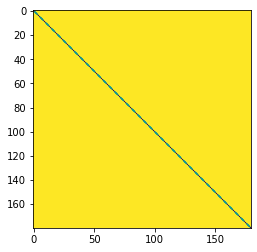

In [50]:
plt.imshow(binarized_adj_mat_pval_based)

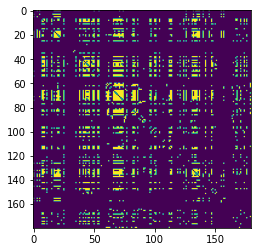

In [51]:
plt.imshow(binarized_adj_mat_top10percent)

# Nodal metrics

In [23]:
num_participants = 57
num_ROIs = 180

# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5
network_metrics = np.zeros((num_participants, num_ROIs, num_metrics))
print(network_metrics.shape)

lst = os.listdir('../Glasser180ts_rest_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_rest_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

    for node_index in range(num_ROIs):
        network_metrics[subj,node_index, :] = np.array([nx.degree_centrality(graph)[node_index], 
                                               nx.eigenvector_centrality(graph)[node_index], 
                                               nx.betweenness_centrality(graph)[node_index],
                                               nx.closeness_centrality(graph)[node_index],
                                               nx.load_centrality(graph)[node_index]])

    subj+=1

with open('network_metrics_rest.npy', 'wb') as f:
    np.save(f, network_metrics)

(57, 180, 5)
sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [24]:
network_metrics_loaded = np.load('network_metrics_rest.npy')
network_metrics_loaded.shape

(57, 180, 5)

In [25]:
P_demean = np.array(results_df['P_demean'])
R_demean = np.array(results_df['R_demean'])

In [26]:
num_participants = 57
num_ROIs = 180

# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(network_metrics_loaded[:, ROI,metric], P_demean)
        if pval<0.05:
            print(corr, pval, ROI+1)

0
0.3189811242006271 0.015586915898399738 6
-0.29851222864737004 0.024102996190659805 15
-0.27038994271404615 0.041927772789489906 17
0.30362813914566006 0.021672797215014673 21
-0.30824104714313383 0.019662563018082505 43
-0.480651641973266 0.00015417487956717732 48
-0.3398726154826248 0.009691876956219389 52
-0.3020157453924537 0.022415290396050374 79
-0.2804722026974617 0.03458155403864557 96
-0.28002815763053884 0.03488091837629721 117
0.39521990473973534 0.0023449718070376047 132
-0.2702175404545012 0.042063762940679615 145
-0.26854744384526047 0.04340000769936018 155
0.29631174397921023 0.025216828812298916 165
-0.350385568139144 0.007539332078548421 170
1
0.2951907757529572 0.025800691103994793 6
-0.3031495116626173 0.021890996583116284 17
0.2932466066057083 0.026840273577246273 21
-0.38650391214163554 0.00298054074384934 43
-0.4503999436030503 0.00043882394428643417 48
-0.3550732800794511 0.006722516612112214 52
-0.2938991556774409 0.026487491627196026 56
-0.28775817605494397 0

In [28]:
patients_df = results_df[:29]
patients_P_demean = np.array(patients_df['P_demean'])
patients_network_metrics = network_metrics_loaded[:29]

In [29]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_P_demean)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
-0.5076912064550205 0.004932709915781124 48
1
2
-0.4800454830930978 0.008402902694021684 34
-0.4981396315020184 0.005958625886974048 84
3
-0.48387117811476654 0.007825642069049793 12
-0.4788643503792756 0.008588215816719097 39
-0.5218366123080266 0.0036915156880014378 47
-0.5560880014242094 0.001734511921553895 51
-0.5323446563261038 0.002952420854244457 54
-0.5625233478794283 0.001491408734145636 56
-0.5381076494266142 0.0026040044474651236 127
-0.5497462262860563 0.00200694235697002 131
-0.5288389327883893 0.0031833969321199166 135
-0.5836790739495872 0.0008879735771153569 149
-0.5458163431822046 0.0021937076691176663 177
4
-0.4972144731468205 0.006066977654341792 34
-0.49258230218516386 0.006634979302725811 84


## fatigue

In [30]:
patients_df = results_df[:29]

In [31]:
patients_network_metrics = network_metrics_loaded[:29]

In [32]:
patients_avg_fatigue = np.array(patients_df['Diary avg fatigue'])
patients_facit = np.array(patients_df['Facit'])

In [34]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_avg_fatigue)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
1
2
3
4


In [35]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_facit)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
-0.5149691393533925 0.004255805552629166 33
-0.5013216670214738 0.005598410868958221 37
-0.5026449772450047 0.005454155197634729 105
0.4891842522971226 0.007079751165676619 166
-0.5145146642593845 0.004295616775730019 179
1
2
-0.5290730421108443 0.0031675031778112058 1
-0.49633147192640253 0.006171947513525677 30
-0.5187776938862251 0.003934397798467755 34
-0.513903075575129 0.004349692807401879 36
-0.5400072105978895 0.0024972109436347148 37
-0.5385532575153431 0.0025786054508659686 156
3
-0.47152252390600413 0.00981901828072937 7
-0.5389685934103883 0.0025551244001494598 14
-0.5383268137122035 0.0025914856072426925 30
-0.49756719460197973 0.006025472343506939 31
-0.5087901237782775 0.004824973497350415 32
-0.682025377329071 4.6090584890354446e-05 33
-0.5346055562873822 0.0028112309267414198 34
-0.4785348479384739 0.008640522935592174 35
-0.48157179632087427 0.008168434817609626 40
-0.5010468194015758 0.005628775703259881 69
-0.5089144766047035 0.004812909453973462 78
-0.60581566717

## immunological markers

In [36]:
patients_esr = np.array(patients_df['ESR'])
patients_il6 = np.array(patients_df['IL-6'])

In [37]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_esr)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.4906822245631794 0.006880667025811227 14
0.635135593548883 0.000214356815269232 34
0.5642025342513407 0.001433067756044751 35
-0.5931803259154923 0.0006953405102129524 39
-0.5762556407748075 0.0010694190307540333 42
-0.4941619307111359 0.006436424582197042 46
-0.5251384982848484 0.0034438702363933584 47
-0.4822869272058474 0.008060491696073757 49
-0.6091246547030217 0.0004533143621681689 54
0.48389152736796553 0.00782266348960326 82
0.470513383495409 0.009999234064148344 106
0.5976248078017046 0.0006185599315417739 119
-0.617390363679952 0.0003598623930451685 148
0.5152318450418324 0.004232937131274776 167
1
0.5508304231457931 0.0019579024534591475 34
0.4917078457079172 0.006747110562205163 35
-0.6195027438733112 0.0003388928588509092 39
-0.591152183921154 0.0007330653459543333 42
-0.4770850707722422 0.008873868577417753 45
-0.5306572523352213 0.0030617308628924315 46
-0.5015556298231689 0.005572672788751086 47
-0.5617094272564609 0.0015204214840464525 54
0.5664548571370309 0.00135

In [38]:
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_il6)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.5670428528656715 0.001338889787336854 22
0.5784085408932207 0.0010137403802981373 147
1
0.5242811593186176 0.003506760461001192 11
0.5433696861736459 0.0023174106366665747 22
0.5615981863695402 0.001524424535580444 74
0.4873425287034382 0.007331181189100247 100
0.6741599081162006 6.0784024099310756e-05 147
2
0.5223346533994375 0.0036532127019565054 91
0.5080757706216903 0.004894776880832688 149
3
-0.5495263947633828 0.002017014137866671 16
-0.5202588525913538 0.003815136799011347 97
-0.5319555280513106 0.0029773262487929404 132
-0.7543205710431224 2.287730469683249e-06 136
-0.5391857995613367 0.0025429181724143674 152
4
0.4903243218627578 0.0069277968940661475 91
0.5000555844591835 0.005739451989745069 149


In [39]:
patients_immun = np.array(patients_df['TNFα'])
# degree, eigen-vector, betweenness, closeness, load
num_metrics = 5

for metric in range(num_metrics):
    print(metric)
    for ROI in range(num_ROIs):
        corr, pval = pearsonr(patients_network_metrics[:, ROI,metric], patients_immun)
        if pval<0.01:
            print(corr, pval, ROI+1)

0
0.5427412326655646 0.002350140169741955 101
0.8422588801806414 1.0123637950225858e-08 104
0.487314522511452 0.007335062080069245 115
0.49341995655337517 0.0065290519171631485 141
0.499994745548219 0.00574630476828341 161
0.5283361767181615 0.0032177608152894155 179
1
0.4826163164455233 0.008011179433954357 101
0.9041007254228456 1.7908279801103444e-11 104
0.5649522307488357 0.0014076673218085878 129
0.5520565459896742 0.0019036950556281008 141
0.7367823485294976 5.174367427736123e-06 161
0.5814675101354848 0.0009389815578389945 179
2
0.6501287084399391 0.00013486635766271184 75
3
-0.4879228772863992 0.007251150645259418 13
-0.6276058673630348 0.0002680932822908153 177
4
0.6389794142678132 0.00019078993158468702 75


# Global metrics

In [42]:
num_participants = 57
num_ROIs = 180

# modularity, small-world sigma, small-world omega, 
num_metrics = 3
global_network_metrics = np.zeros((num_participants, num_metrics))
print(network_metrics.shape)

lst = os.listdir('../Glasser180ts_rest_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_rest_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
                
    graph = nx.from_numpy_matrix(binarized_adj_mat_top10percent)

    # Find modularity
    part = community.best_partition(graph)
    mod = community.modularity(part,graph)
#     global_network_metrics[subj, :] = np.array([mod, nx.sigma(graph), nx.omega(graph)])
    global_network_metrics[subj, :] = np.array([mod])


    subj+=1

with open('global_network_metrics_rest.npy', 'wb') as f:
    np.save(f, global_network_metrics)

(57, 180, 5)
sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [41]:
xi_lapse = np.array(results_df['xi'])

In [43]:
corr, pval = pearsonr(global_network_metrics[:, 0], xi_lapse) #makes no sense for rest
corr, pval

(-0.02899646224535794, 0.8304586210640141)

# Multilinear regression

In [48]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:,None] < r
    return A[mask]

In [53]:
num_participants = 57
num_ROIs = 180


X = np.zeros((num_participants, 16110))
Y = P_demean

lst = os.listdir('../Glasser180ts_run1_npy/')
lst.sort()
subj=0
for npyfile in lst:
    print(npyfile)
    C = np.load(os.path.join('../Glasser180ts_run1_npy/',npyfile))
    corr, pval = pearson_corr_with_pval(C)
    
    adj_mat = corr
    for j in range(num_ROIs):
        for j in range(num_ROIs):
            adj_mat[j][j] = 0
    
    thresholded_absolute_adj_mat_top10percent = threshold_proportional(np.abs(adj_mat), 0.1)
    binarized_adj_mat_top10percent = thresholded_absolute_adj_mat_top10percent>0
    X[subj] = upper_tri_masking(adj_mat)    

    subj+=1

sub-01.npy
sub-02.npy
sub-03.npy
sub-05.npy
sub-07.npy
sub-08.npy
sub-10.npy
sub-12.npy
sub-13.npy
sub-14.npy
sub-15.npy
sub-16.npy
sub-17.npy
sub-18.npy
sub-19.npy
sub-20.npy
sub-23.npy
sub-24.npy
sub-27.npy
sub-28.npy
sub-29.npy
sub-32.npy
sub-33.npy
sub-34.npy
sub-35.npy
sub-37.npy
sub-38.npy
sub-40.npy
sub-42.npy
sub-43.npy
sub-44.npy
sub-46.npy
sub-47.npy
sub-49.npy
sub-50.npy
sub-54.npy
sub-55.npy
sub-56.npy
sub-57.npy
sub-58.npy
sub-59.npy
sub-60.npy
sub-61.npy
sub-64.npy
sub-65.npy
sub-66.npy
sub-68.npy
sub-69.npy
sub-71.npy
sub-72.npy
sub-73.npy
sub-74.npy
sub-75.npy
sub-76.npy
sub-78.npy
sub-79.npy
sub-80.npy


In [104]:
indices = np.arange(num_participants)
np.random.shuffle(indices)
X_shuffled = X[indices]
Y_shuffled = Y[indices]
model = slir.SparseLinearRegression(n_iter=200, verbose=True)

x_train = X_shuffled[:45]
y_train = Y_shuffled[:45]
x_test = X_shuffled[45:]
y_test = Y_shuffled[45:]

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

SLiR (Sparse Linear Regression)
InputDim:16110/OutputLabels:1/TrainNum:45
Iter:10, DimNum:10564, Error:0.000285
Iter:20, DimNum:2130, Error:0.000129
Iter:30, DimNum:382, Error:0.000077
Iter:40, DimNum:138, Error:0.000048
Iter:50, DimNum:74, Error:0.000040
*
Iter:60, DimNum:60, Error:0.000039
*
*
Iter:70, DimNum:48, Error:0.000005
Iter:80, DimNum:42, Error:0.000020
Iter:90, DimNum:41, Error:0.000013
Iter:100, DimNum:41, Error:0.000010
Iter:110, DimNum:41, Error:0.000008
Iter:120, DimNum:41, Error:0.000008
Iter:130, DimNum:41, Error:0.000007
Iter:140, DimNum:41, Error:0.000007
Iter:150, DimNum:41, Error:0.000007
Iter:160, DimNum:41, Error:0.000007
Iter:170, DimNum:41, Error:0.000006
Iter:180, DimNum:41, Error:0.000005
Iter:190, DimNum:41, Error:0.000004
Iter:200, DimNum:41, Error:0.000004


In [105]:
y_pred

array([-4.73595648, -3.24824683, -4.92867827,  0.5295537 , -2.68022195,
        2.17292784, -3.24290022, -2.43836374,  2.13014625, -3.51806692,
       -3.25818848,  2.49758329])

In [106]:
y_test

array([ 2.46608252, -6.2977876 , -0.3573006 ,  4.0166552 ,  5.73740175,
        0.60865463, -6.55232368,  4.86839052,  0.2291673 ,  4.21649654,
       -1.80388124,  6.73947668])

In [107]:
print("Correlation: %.4f" % np.corrcoef(y_pred, y_test)[0, 1])
print("MSE: %.4f" % np.mean((y_pred - y_test) ** 2))

Correlation: 0.3019
MSE: 26.2847


In [108]:
model.coef_[model.coef_>0]

array([1.26227659, 0.8227204 , 1.45826332, 1.48450463, 1.90377789,
       0.45099504, 1.44349439, 1.42971098, 6.1342129 , 0.23616095,
       1.53447003, 0.09167925, 0.62505626, 2.63564451, 3.37017969,
       4.79937553, 0.5726302 , 3.96991018, 1.77952641, 2.76962909,
       0.57410125])